# Data Visualization Assignment

In [1]:
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import random

In [2]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
df = pd.read_csv(url, names=['sepal length','sepal width','petal length','petal width','target'])

In [3]:
df

,sepal length,sepal width,petal length,petal width,target
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [4]:
features = ['sepal length', 'sepal width', 'petal length', 'petal width']
x = df.loc[:, features].values
y = df.loc[:,['target']].values

In [13]:
pca = PCA(n_components=3)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents, columns = ['Along X-axis', 
                                                                  'Along Y-axis',
                                                                  'Along Z-axis',])


In [15]:
finalDf = pd.concat([principalDf, df[['target']]], axis = 1)
x_vals = finalDf['Along X-axis']
y_vals = finalDf['Along Y-axis']
z_vals = finalDf['Along Y-axis']

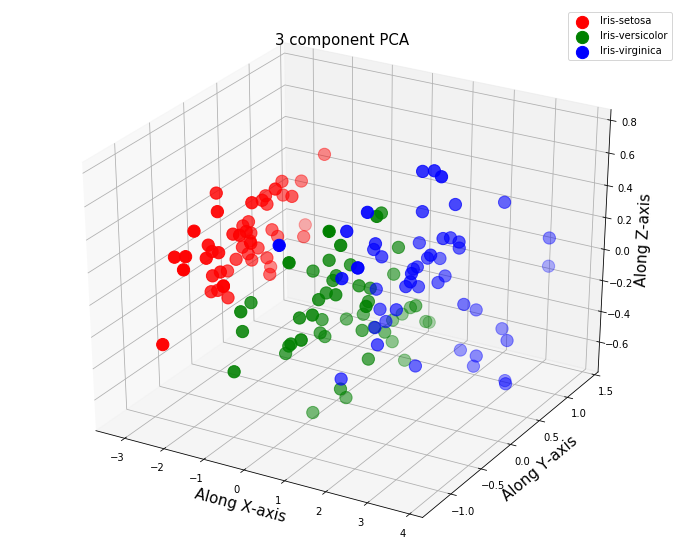

In [20]:
fig = plt.figure(figsize = (12,10))
ax = fig.add_subplot(111, projection='3d')
ax.set_xlabel('Along X-axis', fontsize = 15)
ax.set_ylabel('Along Y-axis', fontsize = 15)
ax.set_zlabel('Along Z-axis', fontsize = 15)
ax.set_title('3 component PCA', fontsize = 15)

targets = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']
colors = ['r', 'g', 'b']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['target'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'Along X-axis']
               , finalDf.loc[indicesToKeep, 'Along Y-axis']
               , finalDf.loc[indicesToKeep, 'Along Z-axis']
               , c = color
               , s = 150)
ax.legend(targets)
ax.grid()
plt.show()